# EDA Notebook
Goals: Explore the attributes of our datasets and identify any preprocessing steps needed. 

**Note**: This is an initial analysis of snapshots of our data. Ideally going forward we will want to utilize the developer APIs to query from the data

# Imports

In [33]:
import pandas as pd
import numpy as np
import folium

import matplotlib.pyplot as plt

import seaborn as sns
sns.set_theme()

# Dataset 1: Electric Charging Locations
Downloaded data contains only electric charging data and is filtered to the state of California

**Developer API**: https://developer.nrel.gov/docs/transportation/alt-fuel-stations-v1/

In [2]:
dtype = {"ZIP": str}
chargers = pd.read_csv('../data/alt_fuel_stations_Feb_2_2023.csv', dtype=dtype)

In [88]:
len(chargers)

13873

In [3]:
for k, v in pd.DataFrame(chargers.isna().sum()).iterrows():
    print(k, v.values)

Fuel Type Code [0]
Station Name [0]
Street Address [0]
Intersection Directions [13502]
City [0]
State [0]
ZIP [0]
Plus4 [13873]
Station Phone [118]
Status Code [0]
Expected Date [13873]
Groups With Access Code [0]
Access Days Time [1171]
Cards Accepted [13301]
BD Blends [13873]
NG Fill Type Code [13873]
NG PSI [13873]
EV Level1 EVSE Num [13832]
EV Level2 EVSE Num [1463]
EV DC Fast Count [12132]
EV Other Info [13845]
EV Network [0]
EV Network Web [894]
Geocode Status [0]
Latitude [0]
Longitude [0]
Date Last Confirmed [18]
ID [0]
Updated At [0]
Owner Type Code [11344]
Federal Agency ID [13861]
Federal Agency Name [13861]
Open Date [2]
Hydrogen Status Link [13873]
NG Vehicle Class [13873]
LPG Primary [13873]
E85 Blender Pump [13873]
EV Connector Types [14]
Country [0]
Intersection Directions (French) [13873]
Access Days Time (French) [13873]
BD Blends (French) [13873]
Groups With Access Code (French) [0]
Hydrogen Is Retail [13873]
Access Code [0]
Access Detail Code [13388]
Federal Agency 

In [4]:
chargers.columns

Index(['Fuel Type Code', 'Station Name', 'Street Address',
       'Intersection Directions', 'City', 'State', 'ZIP', 'Plus4',
       'Station Phone', 'Status Code', 'Expected Date',
       'Groups With Access Code', 'Access Days Time', 'Cards Accepted',
       'BD Blends', 'NG Fill Type Code', 'NG PSI', 'EV Level1 EVSE Num',
       'EV Level2 EVSE Num', 'EV DC Fast Count', 'EV Other Info', 'EV Network',
       'EV Network Web', 'Geocode Status', 'Latitude', 'Longitude',
       'Date Last Confirmed', 'ID', 'Updated At', 'Owner Type Code',
       'Federal Agency ID', 'Federal Agency Name', 'Open Date',
       'Hydrogen Status Link', 'NG Vehicle Class', 'LPG Primary',
       'E85 Blender Pump', 'EV Connector Types', 'Country',
       'Intersection Directions (French)', 'Access Days Time (French)',
       'BD Blends (French)', 'Groups With Access Code (French)',
       'Hydrogen Is Retail', 'Access Code', 'Access Detail Code',
       'Federal Agency Code', 'Facility Type', 'CNG Dispenser N

In [6]:
chargers.head()

,Fuel Type Code,Station Name,Street Address,Intersection Directions,City,State,ZIP,Plus4,Station Phone,Status Code,...,CNG Fill Type Code,CNG PSI,CNG Vehicle Class,LNG Vehicle Class,EV On-Site Renewable Source,Restricted Access,RD Blends,RD Blends (French),RD Blended with Biodiesel,RD Maximum Biodiesel Level
0,ELEC,Los Angeles Convention Center,1201 S Figueroa St,West hall and South hall,Los Angeles,CA,90015,NaN,213-741-1151,E,...,NaN,NaN,NaN,NaN,NaN,False,NaN,NaN,NaN,NaN
1,ELEC,California Air Resources Board,9530 Telstar Ave,NaN,El Monte,CA,91731,NaN,626-575-6800,E,...,NaN,NaN,NaN,NaN,NaN,False,NaN,NaN,NaN,NaN
2,ELEC,Scripps Green Hospital,10666 N Torrey Pines Rd,"Patient Parking Structure, level G",La Jolla,CA,92037,NaN,NaN,E,...,NaN,NaN,NaN,NaN,NaN,False,NaN,NaN,NaN,NaN
3,ELEC,Galpin Motors,15421 Roscoe Blvd,NaN,Sepulveda,CA,91343,NaN,800-256-6219,E,...,NaN,NaN,NaN,NaN,NaN,False,NaN,NaN,NaN,NaN
4,ELEC,Galleria at Tyler,1299 Galleria at Tyler,NaN,Riverside,CA,92503,NaN,951-351-3110,E,...,NaN,NaN,NaN,NaN,NaN,False,NaN,NaN,NaN,NaN


In [7]:
chargers['Status Code'].unique()

array(['E'], dtype=object)

In [8]:
# -118.951721	32.75004	-117.646374	34.823302
la_bb = ((-118.951721, -117.646374),
         (32.75004, 34.823302))

In [9]:
coords = chargers[['ID', 'Latitude', 'Longitude']].copy()
coords.head()

,ID,Latitude,Longitude
0,1523,34.040539,-118.271387
1,1583,34.068720,-118.064000
2,6355,32.899470,-117.243000
3,6405,34.221665,-118.468371
4,6425,33.909914,-117.459053


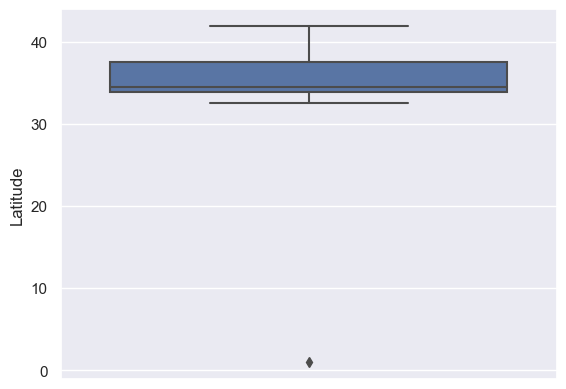

In [91]:
sns.boxplot(data=coords, y='Latitude')
plt.show()

In [98]:
top_20_cities = chargers.groupby('City')['ID'].count().sort_values(ascending=False)[:20]

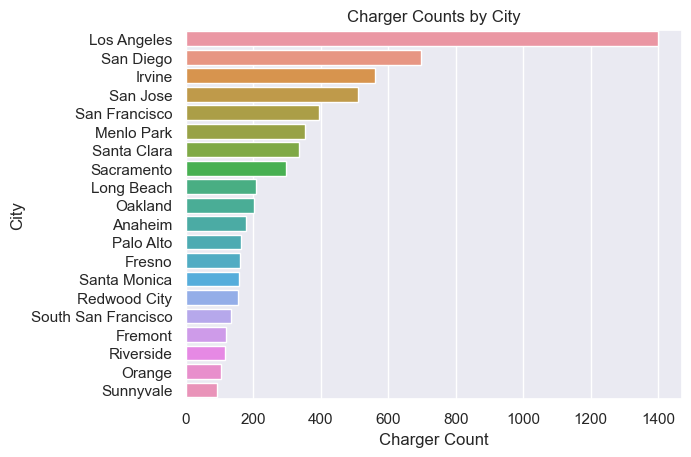

In [103]:
sns.barplot(x=top_20_cities, y=top_20_cities.index).set(xlabel='Charger Count', title='Charger Counts by City')
plt.show()

In [90]:
chargers.Latitude.describe()

count    13873.000000
mean        35.693849
std          2.096940
min          1.000000
25%         33.904510
50%         34.496216
75%         37.587126
max         41.956729
Name: Latitude, dtype: float64

In [ ]:
# CA (rough) bounding box

lat = (32.538, 42.057)
long = (-124.706, -114.104)

In [10]:
map = folium.Map(location=[34.052235, -118.243683])

coords_list = coords.values.tolist()

for i in coords_list:
    id = i[0]
    lat = i[1]
    long = i[2]

    if ((lat >= la_bb[1][0]) and (lat <= la_bb[1][1])) and ((long >= la_bb[0][0] and (long <= la_bb[0][1]))):
        map.add_child(folium.Marker(location=[lat, long], popup=id))



In [12]:
# ma

# Dataset 2: EV Sales

In [13]:
sales = pd.read_excel('../data/New_ZEV_Sales_Last_updated_01-18-2023.xlsx', sheet_name='County')
sales

,Data Year,County,FUEL_TYPE,MAKE,MODEL,Number of Vehicles
0,1998,Los Angeles,Electric,Ford,Ranger,1
1,1998,Orange,Electric,Ford,Ranger,1
2,1998,San Bernardino,Electric,Ford,Ranger,2
3,1998,San Mateo,Electric,Ford,Ranger,1
4,1999,Santa Barbara,Electric,Ford,Ranger,1
...,...,...,...,...,...,...
15586,2022,Yuba,PHEV,Kia,Sorento PHEV,4
15587,2022,Yuba,PHEV,Toyota,Prius Prime,10
15588,2022,Yuba,PHEV,Toyota,RAV4 Prime,6
15589,2022,Yuba,PHEV,Volvo,XC60 Recharge,1


In [ ]:
sales = 

In [24]:
sales_by_year = sales.groupby('Data Year')['Number of Vehicles'].sum()
sales_by_year.head(2)

Data Year
1998    5
1999    1
Name: Number of Vehicles, dtype: int64

In [31]:
sales_by_year.index

Int64Index([1998, 1999, 2000, 2001, 2002, 2003, 2004, 2005, 2006, 2009, 2010,
            2011, 2012, 2013, 2014, 2015, 2016, 2017, 2018, 2019, 2020, 2021,
            2022],
           dtype='int64', name='Data Year')

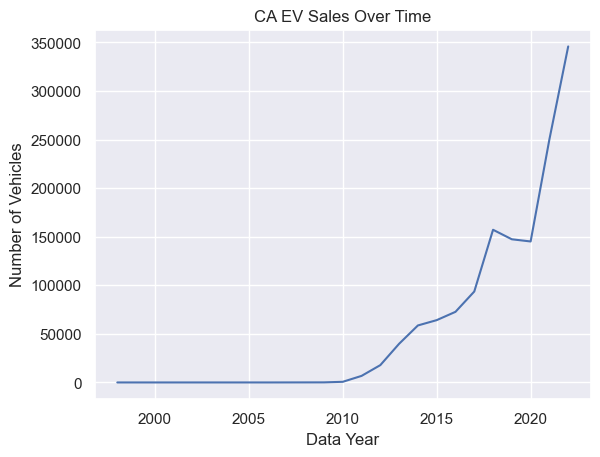

In [36]:
sns.lineplot(x=sales_by_year.index, y=sales_by_year).set(title='CA EV Sales Over Time')

plt.show()

In [37]:
sales.head()

,Data Year,County,FUEL_TYPE,MAKE,MODEL,Number of Vehicles
0,1998,Los Angeles,Electric,Ford,Ranger,1
1,1998,Orange,Electric,Ford,Ranger,1
2,1998,San Bernardino,Electric,Ford,Ranger,2
3,1998,San Mateo,Electric,Ford,Ranger,1
4,1999,Santa Barbara,Electric,Ford,Ranger,1


In [49]:
top_ten_counties = sales.groupby('County')['Number of Vehicles'].sum().sort_values(ascending=False)[:20]
top_ten_counties

County
Los Angeles       377617
Orange            175707
Santa Clara       162030
San Diego         112292
Alameda            96860
San Mateo          56625
Contra Costa       53285
Riverside          50218
San Bernardino     39395
San Francisco      36505
Sacramento         31376
Ventura            28861
Marin              20142
Sonoma             16811
San Joaquin        13287
Out Of State       13021
Placer             12912
Fresno             12233
Santa Barbara      10065
Solano              9685
Name: Number of Vehicles, dtype: int64

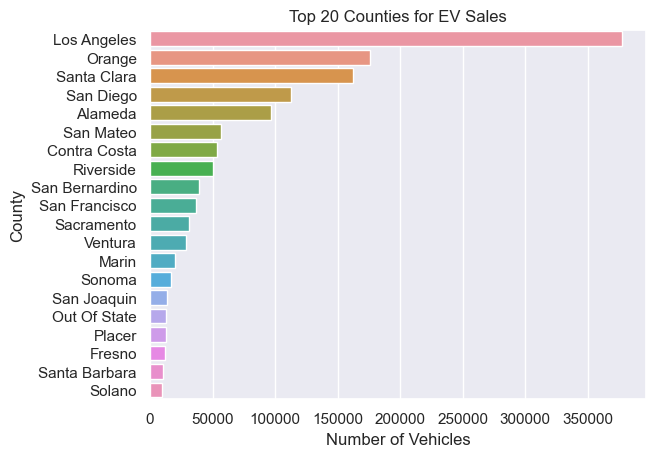

In [52]:
sns.barplot(x=top_ten_counties, y=top_ten_counties.index).set(title='Top 20 Counties for EV Sales')
plt.show()

In [66]:
sales

,Data Year,County,FUEL_TYPE,MAKE,MODEL,Number of Vehicles
0,1998,Los Angeles,Electric,Ford,Ranger,1
1,1998,Orange,Electric,Ford,Ranger,1
2,1998,San Bernardino,Electric,Ford,Ranger,2
3,1998,San Mateo,Electric,Ford,Ranger,1
4,1999,Santa Barbara,Electric,Ford,Ranger,1
...,...,...,...,...,...,...
15586,2022,Yuba,PHEV,Kia,Sorento PHEV,4
15587,2022,Yuba,PHEV,Toyota,Prius Prime,10
15588,2022,Yuba,PHEV,Toyota,RAV4 Prime,6
15589,2022,Yuba,PHEV,Volvo,XC60 Recharge,1


In [54]:
sales.MAKE.unique()

array(['Ford', 'Tesla', 'MINI', 'Honda', 'Chevrolet', 'Toyota', 'Nissan',
       'Smart', 'Mitsubishi', 'BMW', 'Fisker', 'Scion', 'FIAT', 'Porsche',
       'Kia', 'Mercedes-Benz', 'Volkswagen', 'Cadillac', 'McLaren',
       'Hyundai', 'Volvo', 'Audi', 'Chrysler', 'Karma', 'Jaguar',
       'Land Rover', 'Subaru', 'Lincoln', 'Polestar', 'Bentley', 'Lucid',
       'Mazda', 'Rivian', 'Ferrari', 'Jeep', 'Genesis', 'GMC',
       'Toyota/Subaru', 'Lexus'], dtype=object)

In [79]:
def tesla(x):
    if x.MAKE.lower() == 'tesla':
        return 'Tesla'
    
    else:
        return 'Not Tesla'

In [80]:
sales['Tesla'] = sales.apply(tesla, axis=1)

In [81]:
sales_by_tesla = sales.groupby('Tesla')['Number of Vehicles'].sum().sort_values(ascending=False)

In [82]:
sales_by_tesla

Tesla
Not Tesla    764551
Tesla        635362
Name: Number of Vehicles, dtype: int64

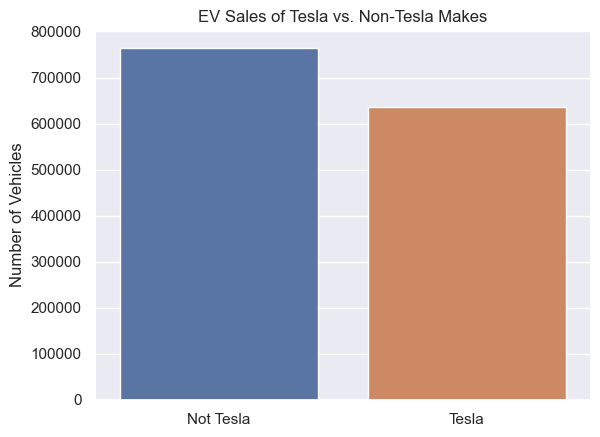

In [106]:
ax = sns.barplot(x=sales_by_tesla.index, y=sales_by_tesla).set(xlabel='', title='EV Sales of Tesla vs. Non-Tesla Makes')
plt.show()

In [61]:
sales_by_make = sales.groupby('MAKE')['Number of Vehicles'].sum().sort_values(ascending=False)
sales_by_make

MAKE
Tesla            635362
Chevrolet        151427
Toyota           120553
BMW               92043
Ford              71657
Nissan            61292
Hyundai           30396
FIAT              29815
Honda             28856
Kia               26012
Volkswagen        25770
Audi              22423
Volvo             19574
Mercedes-Benz     14095
Chrysler          13396
Jeep              11836
Porsche            9849
Smart              5059
Subaru             4802
Polestar           4546
Rivian             4439
MINI               3340
Mitsubishi         3309
Jaguar             1996
Lexus              1909
Lincoln            1122
Land Rover          927
Genesis             921
Cadillac            699
Lucid               667
Mazda               458
Toyota/Subaru       440
Fisker              371
Ferrari             131
Karma               118
GMC                 111
Scion                92
Bentley              73
McLaren              27
Name: Number of Vehicles, dtype: int64

BMW              1831
Tesla            1387
Ford             1299
Chevrolet        1148
Toyota           1114
Hyundai          1023
Kia               831
Volvo             786
Audi              715
Honda             679
Mercedes-Benz     618
Nissan            535
Porsche           525
Volkswagen        382
FIAT              284
Chrysler          261
MINI              248
Mitsubishi        246
Smart             223
Subaru            175
Lincoln           150
Land Rover        144
Jeep              140
Cadillac          131
Jaguar            129
Rivian            105
Polestar           94
Mazda              48
Genesis            47
Lucid              45
Lexus              42
Ferrari            38
Fisker             38
Toyota/Subaru      38
Karma              34
GMC                22
Bentley            20
McLaren            14
Scion               2
Name: MAKE, dtype: int64